In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data'

/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from numpy import argmax
import pandas as pd
import random
import soundfile as sf

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Track to Genre mapping csv
data = pd.read_csv('/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/track_to_genre_mapping.csv')
data.head(10)

,file_name,genre
0,2,Hip-Hop
1,5,Hip-Hop
2,10,Pop
3,140,Folk
4,141,Folk
5,148,Experimental
6,182,Rock
7,190,Folk
8,193,Folk
9,194,Folk


In [5]:
def get_folder_name(i):
  # with input track id, return folder name 

  id_withleading = str(i).zfill(6)
  #print(id_withleading)

  folder_name = id_withleading[:3]
  return folder_name
   

In [6]:
def get_genre_number(genre):

    # We have 8 genres

    if genre == 'Hip-Hop':
        return 0
    elif genre == 'Pop':
        return 1
    elif genre == 'Folk':
        return 2
    elif genre == 'Rock':
        return 3
    elif genre == 'Experimental':
        return 4
    elif genre == 'International':
        return 5
    elif genre == 'Electronic':
        return 6
    else:
        return 7 #instrumental

In [7]:
# preprocessing of the mapping csv

data['genre_number'] = data['genre'].apply(get_genre_number)
data['folder_number'] = data['file_name'].apply(get_folder_name)

# to add leading zeros
data['file_name'] = data['file_name'].apply(lambda x: '{0:0>6}'.format(x)) 

PATH_TO_AUDIO_DATA = '/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/fma_small/'
data['path'] = data['folder_number'].astype('str') + '/' + data['file_name'].astype('str') + ".mp3"
data['path'].head(5)



0    000/000002.mp3
1    000/000005.mp3
2    000/000010.mp3
3    000/000140.mp3
4    000/000141.mp3
Name: path, dtype: object

In [8]:
#test with first track - 000002 is a Hip Hop track
audio_filename = PATH_TO_AUDIO_DATA + data['path'][0]
print(audio_filename)

y, sr = librosa.load(audio_filename, duration = 10)
# can think about using only 10 seconds if it gets too long : 

# we can listen to a snippet of the audio file 
ipd.Audio(data=y, rate=sr)



/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/fma_small/000/000002.mp3


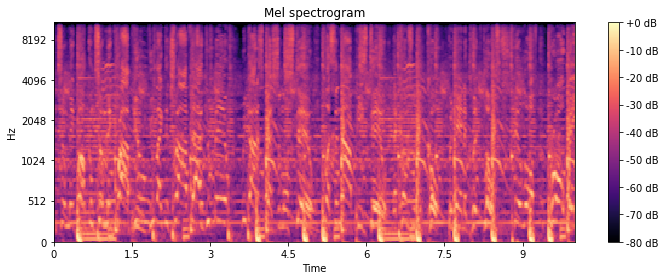

In [9]:
# getting the mel spectrogram - 000002 is a Hip Hop track

ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [10]:
print("shape: " , ps.shape)
print(ps)
print(sr)

shape:  (128, 431)
[[7.2234147e-04 1.7661788e-02 3.8860250e-02 ... 2.5145664e+00
  1.5025439e+00 6.9938588e-01]
 [6.6784525e-04 7.7403197e-03 1.2283567e-02 ... 5.9752651e-02
  1.7818032e-02 2.4433946e-02]
 [2.6097521e-04 1.4586509e-03 4.9857912e-03 ... 3.7961204e-02
  1.4477327e-02 1.4940155e-02]
 ...
 [5.2624064e-06 2.7555752e-05 4.8382595e-04 ... 1.8174160e-02
  3.7642643e-02 4.9352448e-02]
 [5.5173007e-07 3.4637358e-06 8.2593979e-05 ... 2.6208900e-03
  3.3310405e-03 2.9487931e-03]
 [5.9373423e-10 4.4513264e-09 1.2724405e-06 ... 1.7311877e-05
  6.4843484e-06 1.3211905e-04]]
22050


In [11]:
#test with first track - 000255 is a Rock track
audio_filename = PATH_TO_AUDIO_DATA + data['path'][19]
print(audio_filename)

y, sr = librosa.load(audio_filename, duration = 10)
# can think about using only 10 seconds if it gets too long : 

# we can listen to a snippet of the audio file 
ipd.Audio(data=y, rate=sr)


/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/fma_small/000/000255.mp3


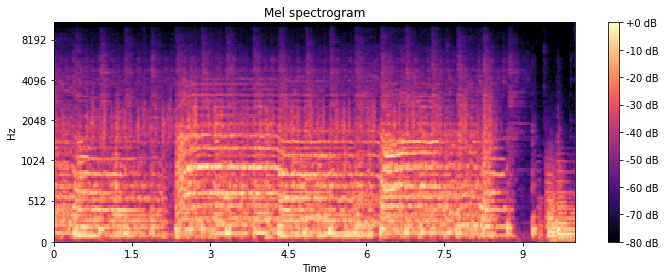

In [12]:
# getting the mel spectrogram - 000255 is a Rock track

ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [13]:
#test with first track - 004519 is an Electronic track
audio_filename = PATH_TO_AUDIO_DATA + data['path'][228]
print(audio_filename)

y, sr = librosa.load(audio_filename, duration = 10)
# can think about using only 10 seconds if it gets too long : 

# we can listen to a snippet of the audio file 
ipd.Audio(data=y, rate=sr)

/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/fma_small/004/004522.mp3


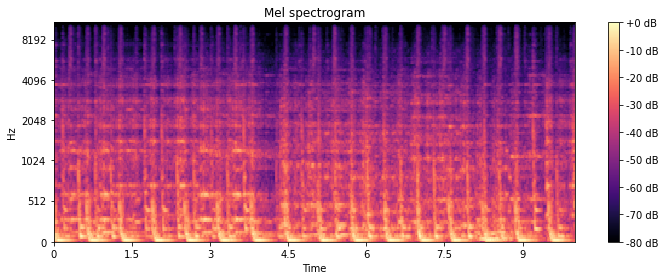

In [14]:
# getting the mel spectrogram - 004519 is an Electronic track

ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [ ]:
# takes 2 hours to run - do not re-run 

# we want to create and collect the spectrograms for all the files
# saving because this takes > 25 min to run otherwise 

spect_data = []

for row in data.itertuples():
  audio_filename = PATH_TO_AUDIO_DATA + row.path
  y, sr = librosa.load(audio_filename, duration = 10)  
  
  ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
  if ps.shape != (128, 431): continue
  
  spect_data.append( (ps, row.genre_number) )

In [16]:
# do not re-run
spect_data_arr = np.array(spect_data)
np.save('/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/spectrograms', spect_data_arr)

In [19]:
spectrogram_data = np.load('/content/drive/MyDrive/MS/Fall22/DeepLearning/Deep Learning Project/Data/spectrograms.npy', allow_pickle=True)


In [20]:
print("Number of samples: ", len(spectrogram_data))

Number of samples:  7994


In [21]:
import torch
